# DAV 6150 Module 4 Assignment

# Feature Selection & Dimensionality Reduction

**Group members: Yifeng Lin, Yuan Zheng and Ziyang Guo**

## Introduction

This dataset is comprised of 39,797 observations and 61 attributes. We will effectively reduce the number of explanatory varibles required for the intended model and apply feature selection and dimensionality reduction techniques to identify the explanatory variables to be included within a linear regression model that predicts the number of times an online news article wiil be shared.

## Data summary:  
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)

In [1]:
# load the pandas & numpy libraries and matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('https://raw.githubusercontent.com/Destiny-G1997/DAV-6150/main/M4_Data.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Exploratory Data Analysis

In [2]:
#drop the column 'url' which is the link of the website
#drop the columns which have categorical attributes.
data_num=data.drop(data.columns[[0,13,14,15,16,17,18,31,32,33,34,35,36,37,38]],axis=1,inplace=False) 
data_num

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [3]:
#show the all details of the dataset
pd.set_option('display.max_columns',None)

In [4]:
# turn the name of each columns into list
column=data.columns.to_list()

In [5]:
# put these attributes together to make a dataset full of categorical data.
data_cate=data[[column[13],
                column[14],
                column[15],
                column[16],
                column[17],
                column[18],
                column[31],
                column[32],
                column[33],
                column[34],
                column[35],
                column[36],
                column[37],
                column[38]]]

In [6]:
data_cate 

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# turn the name of each columns into list
column2=data_cate.columns.to_list()

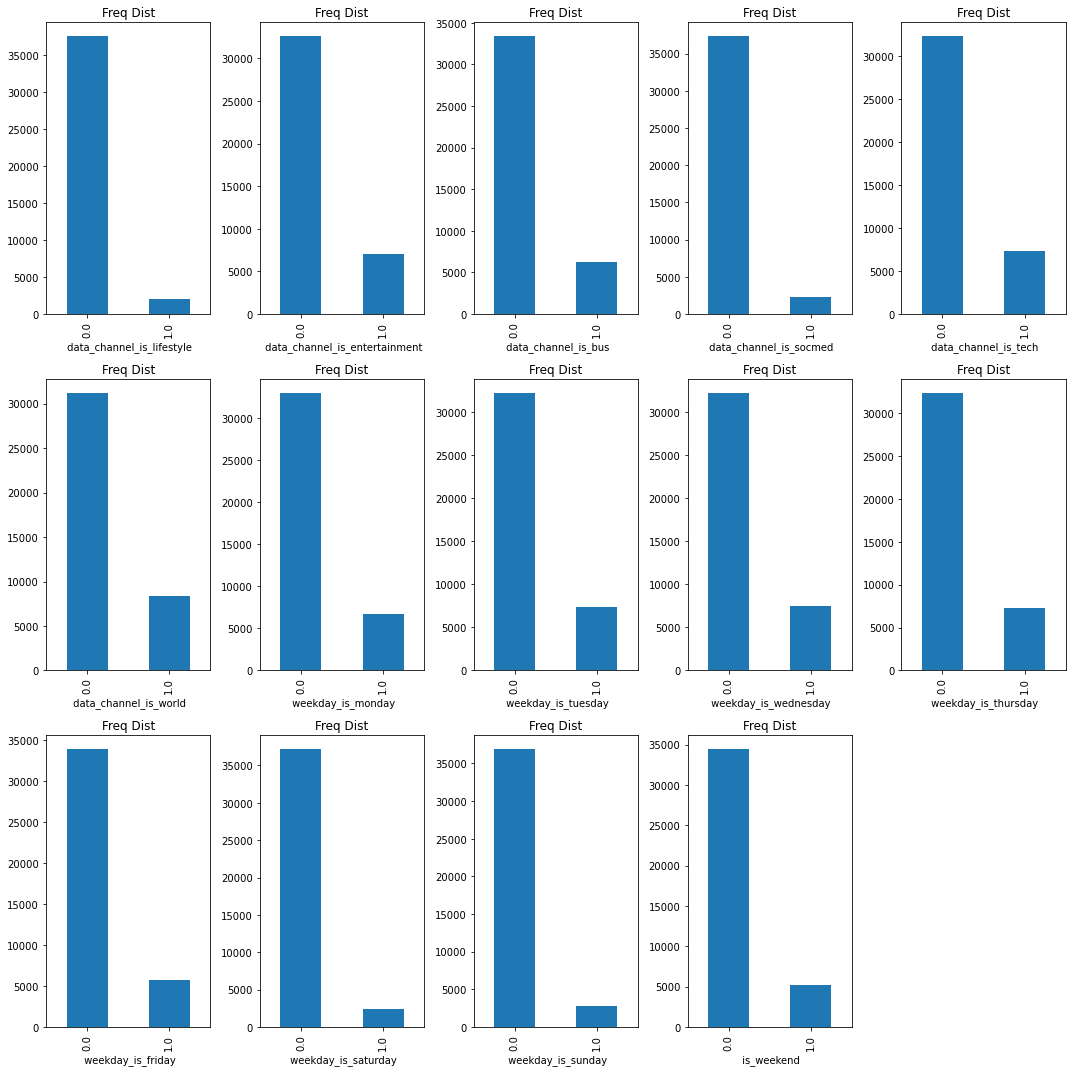

In [8]:
# show barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(15,15))
for i in range(14):
    plt.subplot(3,5,i+1)
    data_cate[column2[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column2[i])
plt.tight_layout()

According to the above bar charts about each categorical data, we can divide them into two parts: one is what kind of the data_channel is and another is what weekdays the share of the article has happened. The number of zero is the most part of each bar chart. We can see from the first six charts that the environment, tech, and world take a big part of whole themes, then comes the topic of bus, finally there are lifestyle and socmed. Then according to the remaining bar charts, we get the conclusion that shares always happened on weekdays than the weekends.

In [9]:
#show the number of attributes and all rows
data_num.shape

(39644, 46)

There are 46 attributes here so we are going to use two 'for loops' to show the distribution.

In [10]:
#turn the name of numercial data columns into list
column3=data_num.columns.to_list()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-p

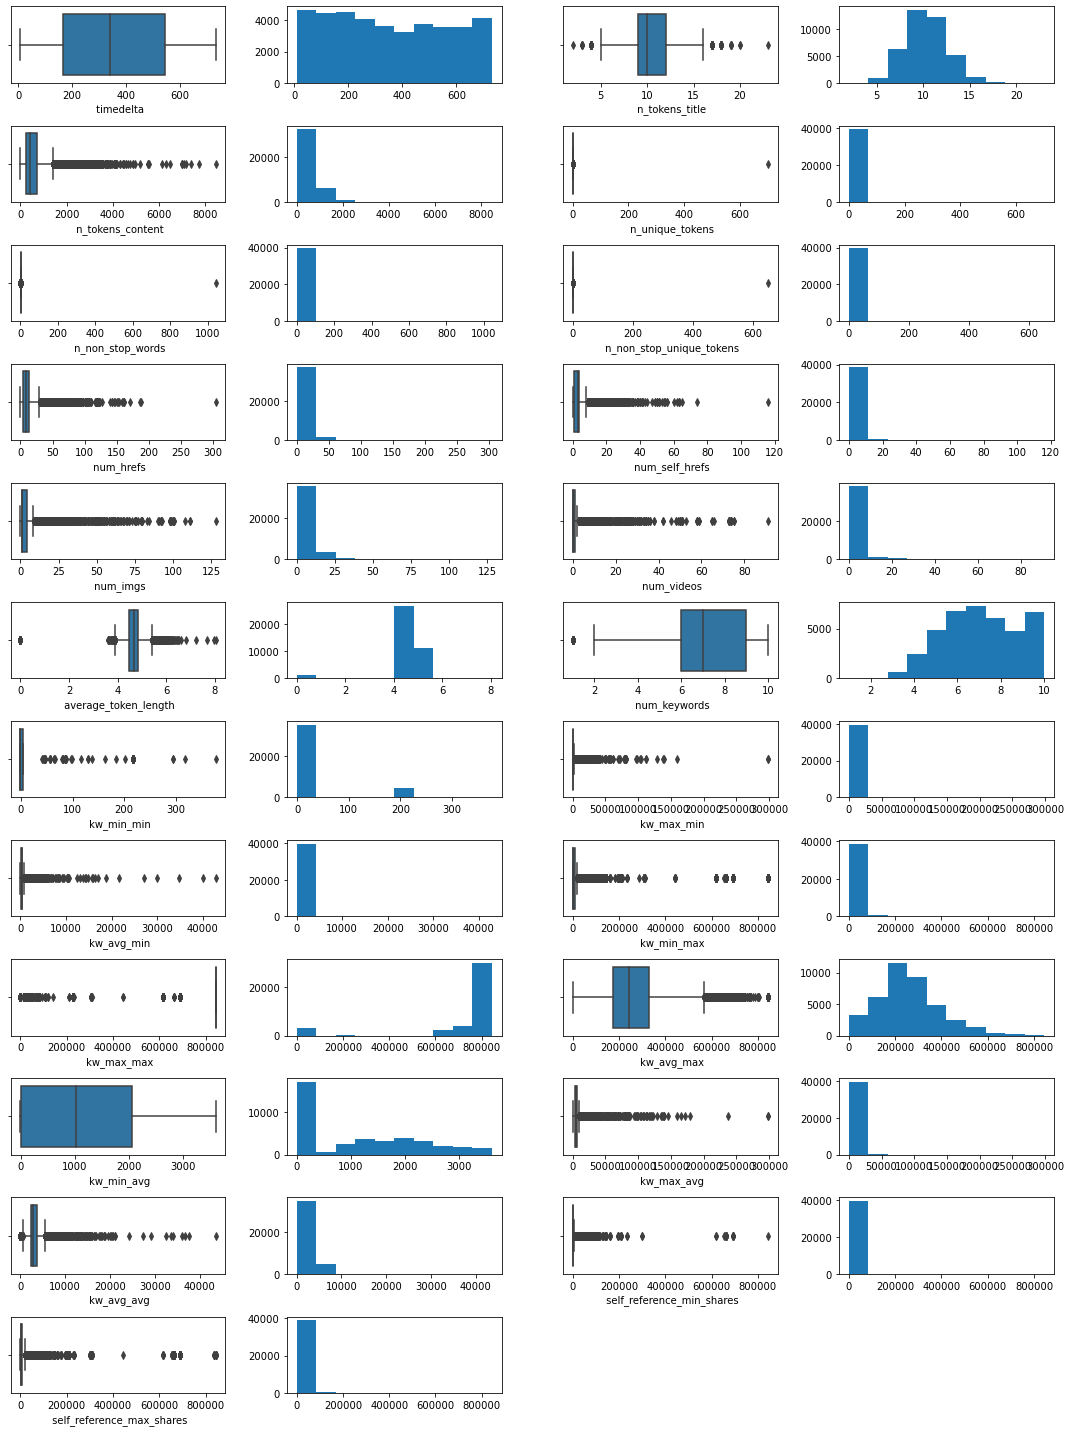

In [11]:
# put the histogram and barplot together to show the distribution of each attribute 
fig=plt.figure(figsize=(15,20))
for i in range(23):
    n=2*i
    plt.subplot(12,4,n+1)
    sns.boxplot(data_num[column3[i]])
    plt.subplot(12,4,n+2)
    plt.hist(data_num[column3[i]])
    
plt.tight_layout()

According to the above histograms and boxplots, we found that most columns are gathered at the smaller value bins, and some attributes like 'kw_avg_max', 'n_tokens_title', and num_keywords are nearly conformed to the normal distribution. There are three strange columns:'n_unique_tokens', 'n_non_stop_words', and 'n_non_stop_unique_tokens'. According to their boxplots, we can know these data nearly gathered together, in other words, they might have low variance.

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-p

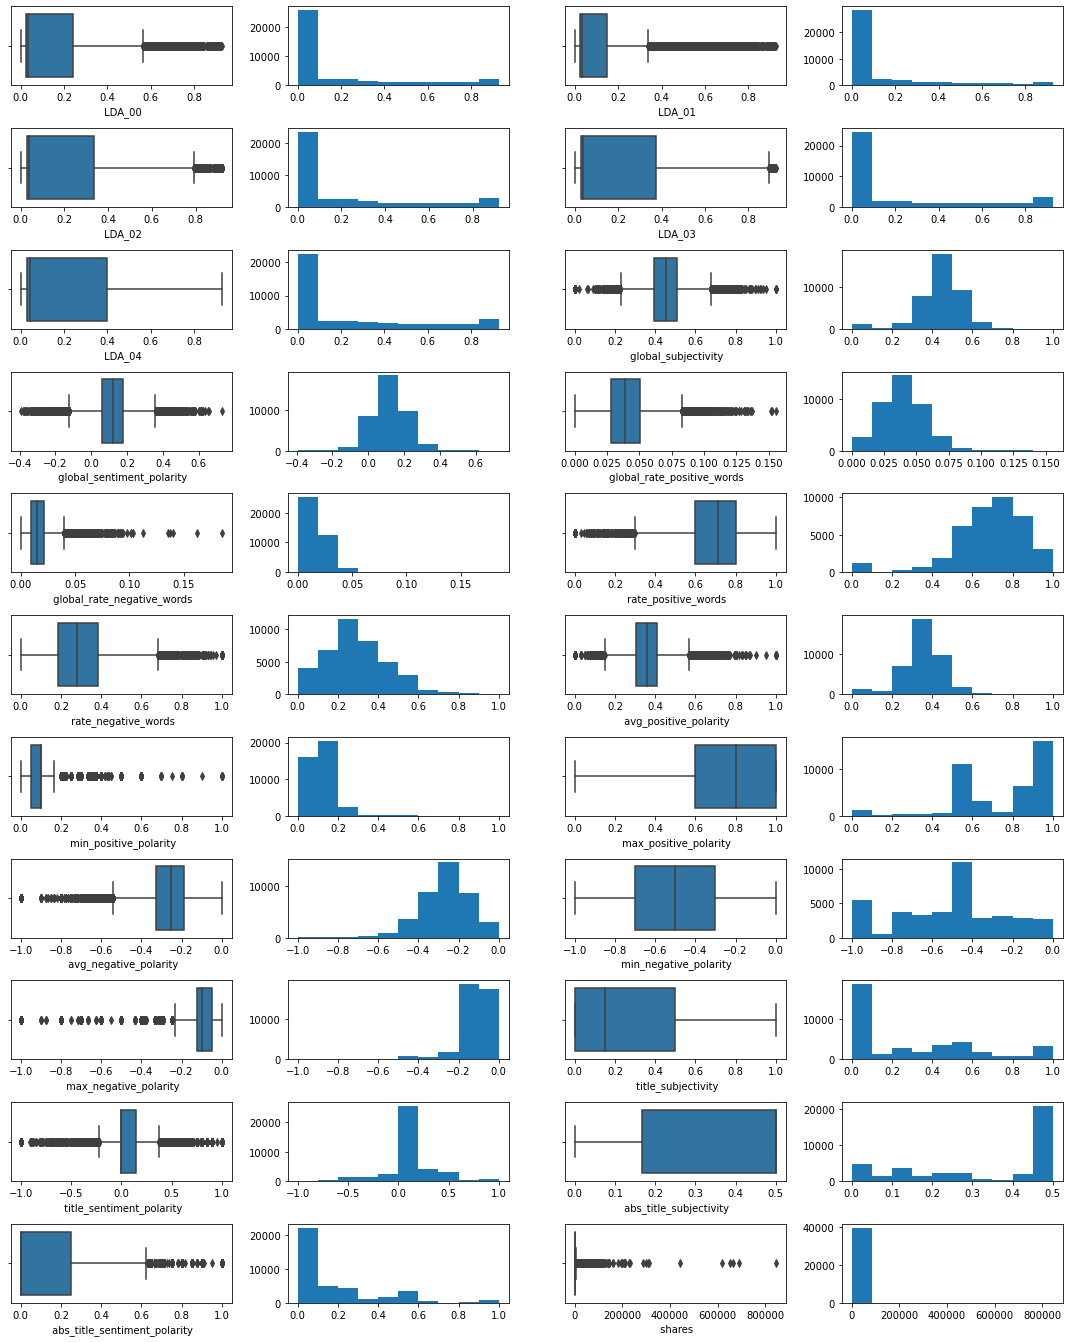

In [12]:
# put the histogram and barplot together to show the distribution of each attribute 
fig=plt.figure(figsize=(15,20))
for i in range(24,46):
    n=2*i
    plt.subplot(12,4,n-47)
    sns.boxplot(data_num[column3[i]])
    plt.subplot(12,4,n-46)
    plt.hist(data_num[column3[i]])
    
plt.tight_layout()

According to the above histograms and boxplots, we found that most columns are gathered at the smaller value bins, and some attributes like     'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', and 'avg_negatibe_polarity' nearly conform to the normal distribution. The charts about shares tell us that most of the shares have small values, some of which are unusually large values that have deviated from the mean value.

In [13]:
data_num.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


According to the correlation between attributes, we decide to remove attributes that have a correlation lower than 0.01 with shares.

In [14]:
#the correlation between each attributes 
data_num.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,0.130465,0.046884,0.591199,0.029503,0.133225,-0.076590,-0.637824,-0.493093,-0.157204,-0.051820,-0.163164,-0.011438,-0.014501,-0.015655,0.080894,0.004423,-0.141713,-0.030838,0.092906,0.133837,0.158646,0.207604,0.010266,0.198654,-0.071968,0.126344,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,-0.006077,-0.110672,-0.005890,-0.031400,0.012926,0.120841,0.115746,-0.002370,0.006918,0.004296,-0.004563,0.000128,0.000661,-0.070038,0.063568,0.038365,0.042208,-0.065063,-0.056804,-0.072226,-0.064951,0.015530,-0.066589,0.034186,-0.049619,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,0.072845,-0.054345,0.000066,-0.003545,-0.022786,0.058860,-0.096460,-0.022286,-0.030496,-0.079624,-0.030686,0.025657,-0.013809,0.026218,-0.009724,0.087266,-0.140141,0.041265,0.127879,0.021937,0.133979,0.125013,0.098960,0.101053,0.135123,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,-0.003679,0.001601,-0.000552,-0.000826,0.000577,-0.001624,0.000805,0.004563,-0.002120,-0.002083,0.001036,-0.000222,0.001992,-0.002213,-0.000827,-0.006855,-0.003689,-0.004260,-0.000180,0.000523,0.000014,-0.000877,-0.000667,-0.001657,-0.000487,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,-0.001439,-0.000352,-0.000595,-0.000892,-0.000553,0.000394,-0.002939,0.003284,-0.003408,-0.005415,0.000339,0.000170,0.001614,-0.001031,-0.002869,-0.003286,-0.009761,-0.001072,0.002565,0.000831,0.001535,0.001036,0.002421,0.001245,0.002285,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,0.034185,-0.004440,0.002001,-0.000615,-0.000644,-0.000089,-0.002032,-0.002006,0.002510,-0.003694,-0.005944,0.000989,-0.000077,0.002009,0.000342,-0.000965,-0.004965,-0.009781,-0.002097,0.005498,0.002043,0.005002,0.002590,0.005258,0.001709,0.004671,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,0.222588,0.125890,-0.043263,0.012844,0.008307,-0.020150,0.051265,-0.019269,0.058920,0.069692,0.121419,-0.004804,0.080394,0.025239,-0.020100,-0.053803,-0.012531,0.123786,-0.054977,0.203464,0.086859,0.056428,0.032515,0.101663,0.059817,0.188236,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396

In [15]:
#drop the columns which have low correlation
data_num1 = data_num.drop(data_num.columns[[0,1,2,4,7,9,12,13,21,22,23,25,27,28,29,30,31,33,35,36,37,40]],axis=1,inplace=False)

In [16]:
data_num1

,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_imgs,average_token_length,num_keywords,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,LDA_00,LDA_02,global_rate_negative_words,rate_negative_words,avg_negative_polarity,min_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.663594,0.815385,4.0,1.0,4.680365,5.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.500331,0.040005,0.013699,0.230769,-0.350000,-0.600,0.500000,-0.187500,0.000000,0.187500,593
1,0.604743,0.791946,3.0,1.0,4.913725,4.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.799756,0.050096,0.015686,0.266667,-0.118750,-0.125,0.000000,0.000000,0.500000,0.000000,711
2,0.575130,0.663866,3.0,1.0,4.393365,6.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.217792,0.033351,0.009479,0.142857,-0.466667,-0.800,0.000000,0.000000,0.500000,0.000000,1500
3,0.503788,0.665635,9.0,1.0,4.404896,7.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.028573,0.494651,0.020716,0.333333,-0.369697,-0.600,0.000000,0.000000,0.500000,0.000000,1200
4,0.415646,0.540890,19.0,20.0,4.682836,7.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.028633,0.028575,0.012127,0.139785,-0.220192,-0.500,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.529052,0.684783,9.0,1.0,4.523121,8.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,0.025038,0.151701,0.014451,0.277778,-0.260000,-0.500,0.100000,0.000000,0.400000,0.000000,1800
39640,0.696296,0.885057,9.0,3.0,4.405488,7.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,0.029349,0.231866,0.009146,0.187500,-0.211111,-0.400,0.300000,1.000000,0.200000,1.000000,1900
39641,0.516355,0.644128,24.0,12.0,5.076923,8.0,168.250,6200.0,843300.0,295850.000000,1753.882353,6880.687034,4206.439195,0.159004,0.025207,0.024887,0.423077,-0.356439,-0.800,0.454545,0.136364,0.045455,0.136364,1900
39642,0.539493,0.692661,10.0,1.0,4.975073,5.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883,0.040004,0.839987,0.023460,0.533333,-0.205246,-0.500,0.000000,0.000000,0.500000,0.000000,1100


In [17]:
data_num1.describe()

,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_imgs,average_token_length,num_keywords,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,LDA_00,LDA_02,global_rate_negative_words,rate_negative_words,avg_negative_polarity,min_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.548216,0.689175,10.883690,4.544143,4.548239,7.223767,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,0.184599,0.216321,0.016612,0.287934,-0.259524,-0.521944,0.282353,0.071425,0.341843,0.156064,3395.380184
std,3.520708,3.264816,11.332017,8.309434,0.844406,1.909130,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,0.262975,0.282145,0.010828,0.156156,0.127726,0.290290,0.324247,0.265450,0.188791,0.226294,11626.950749
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,0.470870,0.625739,4.000000,1.000000,4.478404,6.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,0.025051,0.028571,0.009615,0.185185,-0.328383,-0.700000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,0.539226,0.690476,8.000000,1.000000,4.664082,7.000000,235.500000,1400.000000,843300.000000,244572.222223,1023.635611,4355.688836,2870.074878,0.033387,0.040004,0.015337,0.280000,-0.253333,-0.500000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,0.608696,0.754630,14.000000,4.000000,4.854839,9.000000,357.000000,7900.000000,843300.000000,330980.000000,2056.781032,6019.953968,3600.229564,0.240958,0.334218,0.021739,0.384615,-0.186905,-0.300000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,701.000000,650.000000,304.000000,128.000000,8.041534,10.000000,42827.857143,843300.000000,843300.000000,843300.000000,3613.039820,298400.000000,43567.659946,0.926994,0.919999,0.184932,1.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


After selecting and dropping suitable columns, then we are moving to use these data to do the dimensionality reduction.

## Feature Selection / Dimensionality Reduction

In [18]:
# load PCA + cross validation functions + linear regression model
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [19]:
data_num1.rename(columns = {' shares':'shares'},inplace = True)
# assign the explanatory variables to a Python object
X = data_num1.copy()
# assign the response variable to a Python object
y = data_num1.shares
X.drop('shares', axis = 1, inplace = True)

In [20]:
# split the data into training + testing subsets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=0)

In [21]:
# create an instance of a PCA model +
# set the number of components we want to retain
pca = PCA(n_components = 2)
# apply the PCA function to the training data
pca.fit(X_train)

PCA(n_components=2)

In [22]:
# display the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_)

[0.799404   0.16707591]


The application of PCA to the data set has yielded two principal components, the first of which explains 86.460% of the variance in the iris data. The second principal component explains an additional 11.444% of the variance in the data. Therefore, the two principal components explain a total of more than 97% of the variance in the data set.

In [23]:
# display the singular values associated with the 2 principal components
print(pca.singular_values_)

[35710267.90823308 16325514.37966385]


## Regression Model Evaluation

In [24]:
# now apply the results of the PCA to the training data to transform it into 2 principal components per observation
X_t_train = pca.transform(X_train)
# apply the results of the PCA to the testing data to transform it into 2 principal components per observation
X_t_test = pca.transform(X_test)
# create an instance of an linear regression model
clf = LinearRegression()
# fit the linear regression model to the transformed training data + the response data
clf.fit(X_t_train, y_train)
# check the accuracy of the linear regression model using the transformed explanatory variables + the response variable
print('score', clf.score(X_t_test, y_test))

score 0.00018003702962465784


Our linear regression model has achieved an accuracy score lower than 1% when applied to the two principal components we derived from this data.

In [25]:
# if desired, generate predictions from the linear regression for the transformed testing data
print ('pred label', clf.predict(X_t_test) )

pred label [3283.9030476  2989.70841683 4095.0352143  ... 3193.63910022 3086.08027169
 4534.76064689]


## Conclusions

According to the R^2 score, we can see that the accuracy of this model is low. Because the correlation coefficient between 'shares' column and other columns is inherently low, and the dimensionality reduction also influence it in some degree. If we set the n_components bigger, the accuracy of this model will improve.